In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

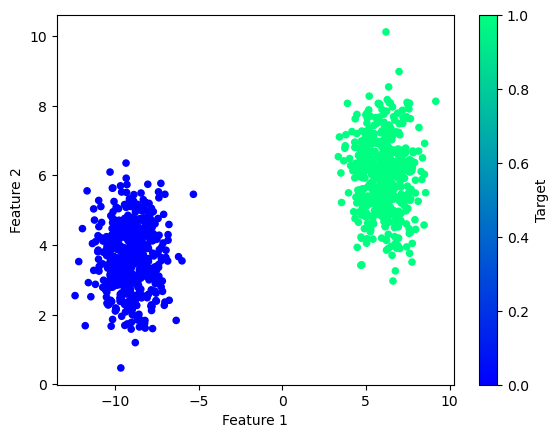

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7711 - accuracy: 0.4360
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7566 - accuracy: 0.4413
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7438 - accuracy: 0.4587
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7328 - accuracy: 0.4707
Epoch 5/100
24/24 [==============================] - 0s 958us/step - loss: 0.7230 - accuracy: 0.4840
Epoch 6/100
24/24 [==============================] - 0s 999us/step - loss: 0.7144 - accuracy: 0.4947
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7069 - accuracy: 0.5107
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6997 - accuracy: 0.5360
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5507
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5613
Epoch

24/24 [==============================] - 0s 965us/step - loss: 0.1096 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 961us/step - loss: 0.1076 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 959us/step - loss: 0.1057 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1020 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 962us/step - loss: 0.0985 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 997us/step - loss: 0.0968 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0935 - accuracy: 1.0000
Epo

<AxesSubplot:>

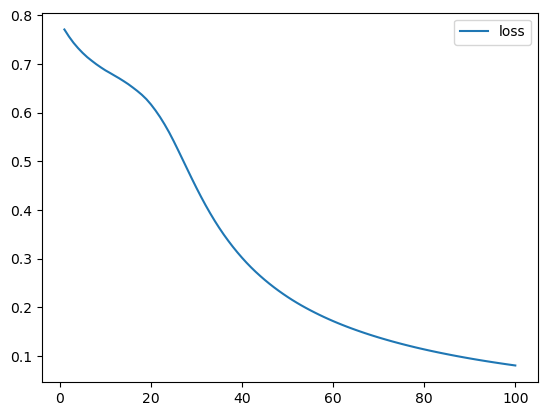

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

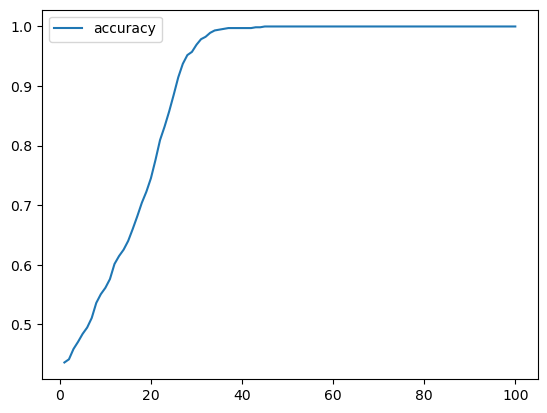

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0837 - accuracy: 1.0000 - 107ms/epoch - 13ms/step
Loss: 0.08371534198522568, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 58ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

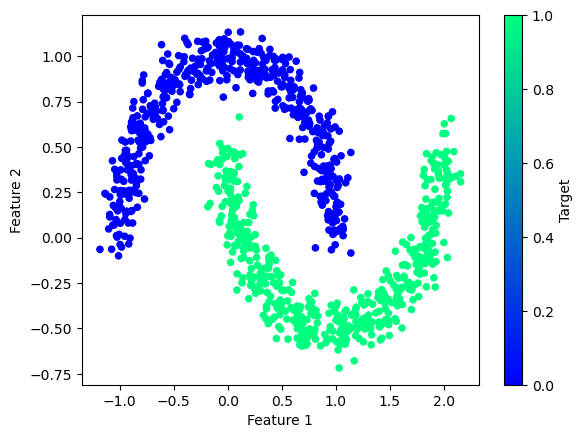

In [17]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.7000
Epoch 2/100
24/24 [==============================] - 0s 990us/step - loss: 0.5977 - accuracy: 0.7173
Epoch 3/100
24/24 [==============================] - 0s 909us/step - loss: 0.5636 - accuracy: 0.7240
Epoch 4/100
24/24 [==============================] - 0s 912us/step - loss: 0.5356 - accuracy: 0.7347
Epoch 5/100
24/24 [==============================] - 0s 974us/step - loss: 0.5149 - accuracy: 0.7427
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7533
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7560
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7613
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7640
Epoch 10/100
24/24 [==============================] - 0s 958us/step - loss: 0.4478 - accuracy: 0.7680

24/24 [==============================] - 0s 869us/step - loss: 0.2635 - accuracy: 0.8933
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2633 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2630 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 989us/step - loss: 0.2628 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8933
Epoch 88/100
24/24 [==============================] - 0s 999us/step - loss: 0.2621 - accuracy: 0.8947
Epoch 89/100
24/24 [==============================] - 0s 916us/step - loss: 0.2619 - accuracy: 0.8947
Epoch 90/100
24/24 [==============================] - 0s 955us/step - loss: 0.2617 - accuracy: 0.8933
Epoch 91/100
24/24 [==============================] - 0s 957us/step - loss: 0.2616 - accuracy: 0.8933
E

<AxesSubplot:>

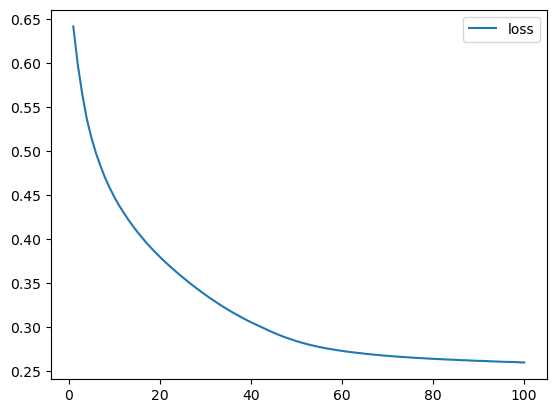

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

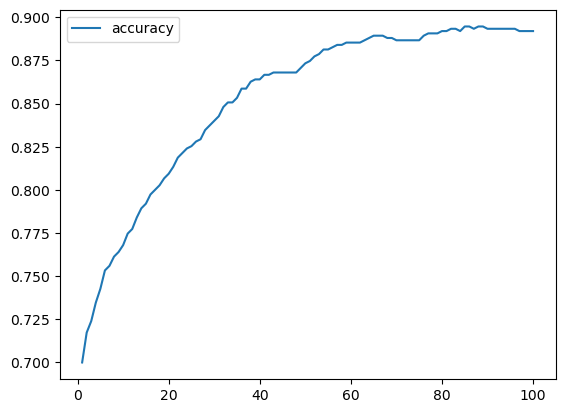

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [24]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [25]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8653 - accuracy: 0.1773
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8039 - accuracy: 0.1787
Epoch 3/100
24/24 [==============================] - 0s 955us/step - loss: 0.7525 - accuracy: 0.1880
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7101 - accuracy: 0.4787
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6736 - accuracy: 0.5707
Epoch 6/100
24/24 [==============================] - 0s 964us/step - loss: 0.6443 - accuracy: 0.5880
Epoch 7/100
24/24 [==============================] - 0s 995us/step - loss: 0.6185 - accuracy: 0.5907
Epoch 8/100
24/24 [==============================] - 0s 996us/step - loss: 0.5969 - accuracy: 0.5947
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.6000
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5603 - accuracy: 0.6147
E

24/24 [==============================] - 0s 1ms/step - loss: 0.2194 - accuracy: 0.9040
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2186 - accuracy: 0.9053
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2178 - accuracy: 0.9053
Epoch 85/100
24/24 [==============================] - 0s 957us/step - loss: 0.2169 - accuracy: 0.9067
Epoch 86/100
24/24 [==============================] - 0s 957us/step - loss: 0.2160 - accuracy: 0.9080
Epoch 87/100
24/24 [==============================] - 0s 957us/step - loss: 0.2154 - accuracy: 0.9067
Epoch 88/100
24/24 [==============================] - 0s 957us/step - loss: 0.2143 - accuracy: 0.9080
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2135 - accuracy: 0.9080
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9093
Epoch 91/100
24/24 [==============================] - 0s 954us/step - loss: 0.2118 - accuracy: 0.9093
Epo